In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('Social_Network_Ads.csv')

In [72]:
df.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [22]:
df.drop('User ID',axis=1,inplace=True)

In [23]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [24]:
df = pd.get_dummies(df,drop_first=True)

In [25]:
df.head(10)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
5,27,58000,0,1
6,27,84000,0,0
7,32,150000,1,0
8,25,33000,0,1
9,35,65000,0,0


In [27]:
x = df.loc[:,['Age','EstimatedSalary','Gender_Male']].values
y = df.loc[:,['Purchased']].values

In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
sc = StandardScaler ()

In [56]:
X = sc.fit_transform (x)


In [92]:
X


array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [58]:
y.shape

(400, 1)

In [59]:
Y = y.reshape(-1)

In [60]:
Y.shape

(400,)

In [61]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [77]:
acc_list=[]
err_list=[]
for i in range(1,25):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        # print("For k={},accuracy = {}"format(i,acc))
        
        acc_list.append(acc)
        err_list.append(1-acc)

In [78]:
acc_list

[0.92,
 0.9,
 0.92,
 0.92,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.92,
 0.92,
 0.91,
 0.92,
 0.9]

In [80]:
acc_list

[0.92,
 0.9,
 0.92,
 0.92,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.92,
 0.92,
 0.91,
 0.92,
 0.9]

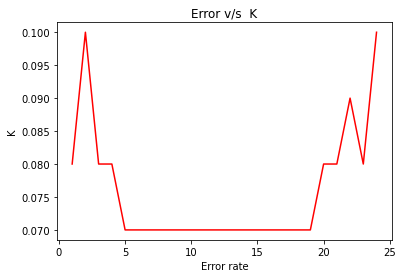

In [81]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error v/s  K')
plt.xlabel('Error rate')
plt.ylabel('K')
plt.show()

In [82]:
model = KNeighborsClassifier (n_neighbors = 5)

In [83]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred)

0.93